# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time as t

# Import API key
api_key = '17d0c513c342df6edd66c3c2eea4796e'


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [49]:
url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [51]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [53]:
counter = 0

responsename = []
responsedate = []
responsecnt = []
responsetemp = []
responsehum = []
responsecloud = []
responsewind = []
responselat = []
responselon = []

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city + '&units=imperial'  
    response = requests.get(query_url).json()
    
    try:
        name = response['name']
        
        date = response['main']['temp_max']
  
        cnt = response['sys']['country']
    
        time = response['dt']
    
        hum = response['main']['humidity']
    
        cloud = response['clouds']['all']
   
        temp = response['main']['temp_max']
    
        wind = response['wind']['speed']
    
        lat = response['coord']['lat']
    
        lon = response['coord']['lon']
    except:
        print(f"City not found, testing next.")
    responselon.append(lon)        
    responselat.append(lat)
    responsewind.append(wind)
    responsename.append(name)
    responsetemp.append(temp)
    responsecnt.append(cnt)
    responsedate.append(time)
    responsehum.append(hum)
    responsecloud.append(cloud)
    
    counter = counter + 1
    
    print(f"Processing city number:{counter}  City name:{city}")
    t.sleep(2)
    
                                          
   

Processing city number:1  City name:te anau
Processing city number:2  City name:suez
Processing city number:3  City name:yellowknife
Processing city number:4  City name:new norfolk
Processing city number:5  City name:vardo
Processing city number:6  City name:katsuura
City not found, testing next.
Processing city number:7  City name:jiaojiang
Processing city number:8  City name:port hardy
Processing city number:9  City name:provideniya
Processing city number:10  City name:hithadhoo
Processing city number:11  City name:dikson
Processing city number:12  City name:nusaybin
Processing city number:13  City name:hasaki
Processing city number:14  City name:bilibino
Processing city number:15  City name:george town
Processing city number:16  City name:beyneu
Processing city number:17  City name:vaini
Processing city number:18  City name:puerto ayora
Processing city number:19  City name:kodiak
Processing city number:20  City name:honiara
Processing city number:21  City name:cayenne
Processing cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
citydata = []
citydata = zip(responsename, responsecloud, responsecnt, responsedate, responsehum, responselat, responselon, responsetemp, responsewind)

NameError: name 'responsename' is not defined

In [55]:
citydf = pd.DataFrame(citydata)

In [56]:
citydf = citydf.rename(index = str, columns = {0:"City", 1:'Cloud Cover',2:'Country',3:'Date',4:'Humidity',5:'Lat',6:'Lon', 7:'Temp',8:'Wind Speed'})

In [57]:
citydf.count()

City           590
Cloud Cover    590
Country        590
Date           590
Humidity       590
Lat            590
Lon            590
Temp           590
Wind Speed     590
dtype: int64

In [58]:
citydf.head()

,City,Cloud Cover,Country,Date,Humidity,Lat,Lon,Temp,Wind Speed
0,Te Anau,57,NZ,1562196857,86,-45.41,167.72,41.12,3.60
1,Suez,0,EG,1562196860,75,29.97,32.54,72.98,10.74
2,Yellowknife,75,CA,1562196765,72,62.45,-114.38,59.00,10.29
3,New Norfolk,20,AU,1562196864,86,-42.78,147.06,54.00,6.93
4,Vardo,1,US,1562196866,74,39.62,-77.74,84.99,1.50


In [59]:
citydf.to_csv('WeatherData.csv', index = False )

''

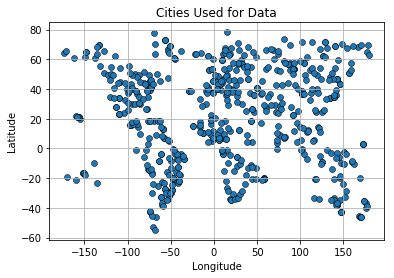

In [60]:
xlon = citydf['Lon']
ylat = citydf['Lat']
plt.scatter(xlon, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cities Used for Data')
fig = plt.gcf()
fig.savefig("Images/Cities.png")
;

In [7]:
citydf = pd.read_csv('WeatherData.csv')
citydf.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>City</th>\n      <th>Cloud Cover</th>\n      <th>Country</th>\n      <th>Date</th>\n      <th>Humidity</th>\n      <th>Lat</th>\n      <th>Lon</th>\n      <th>Temp</th>\n      <th>Wind Speed</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Te Anau</td>\n      <td>57</td>\n      <td>NZ</td>\n      <td>1562196857</td>\n      <td>86</td>\n      <td>-45.41</td>\n      <td>167.72</td>\n      <td>41.12</td>\n      <td>3.60</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Suez</td>\n      <td>0</td>\n      <td>EG</td>\n      <td>1562196860</td>\n      <td>75</td>\n      <td>29.97</td>\n      <td>32.54</td>\n      <td>72.98</td>\n      <td>10.74</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Yellowknife</td>\n      <td>75</td>\n      <td>CA</td>\n      <td>1562196765</td>\n      <td>72</td>\n      <td>62.45</td>\n      <td>-114.38</td>\n  

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
pd.set_option('colheader_justify', 'center')   # FOR TABLE <th>

html_string = '''
<html>
  <head><title>HTML Pandas Dataframe with CSS</title></head>
  <link rel="stylesheet" type="text/css" href="df_style.css"/>
  <body>
    {table}
  </body>
</html>.
'''

# OUTPUT AN HTML FILE
with open('myhtml.html', 'w') as f:
    f.write(html_string.format(table=citydf.to_html(classes='mystyle')))

''

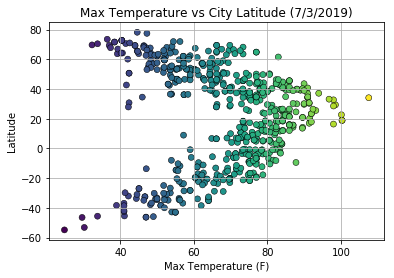

In [61]:
xtemp = citydf['Temp']
ylat = citydf['Lat']
plt.scatter(xtemp, ylat, c=xtemp, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.title('Max Temperature vs City Latitude (7/3/2019)')
fig = plt.gcf()
fig.savefig("Images/Temp.png")
;

#### Latitude vs. Humidity Plot

''

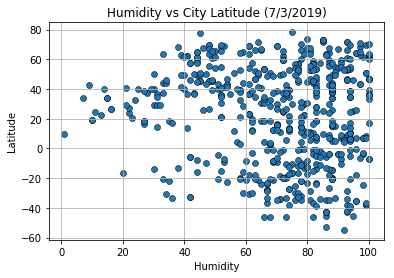

In [62]:
xhum = citydf['Humidity']
ylat = citydf['Lat']
plt.scatter(xhum, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Humidity vs City Latitude (7/3/2019)')
fig = plt.gcf()
fig.savefig("Images/Humidity.png")
;

#### Latitude vs. Cloudiness Plot

''

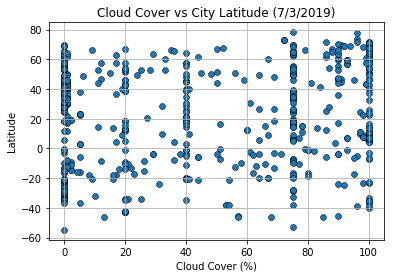

In [63]:
xcld = citydf['Cloud Cover']
ylat = citydf['Lat']
plt.scatter(xcld, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Latitude')
plt.title('Cloud Cover vs City Latitude (7/3/2019)')
fig = plt.gcf()
fig.savefig("Images/Clouds.png")
;

#### Latitude vs. Wind Speed Plot

''

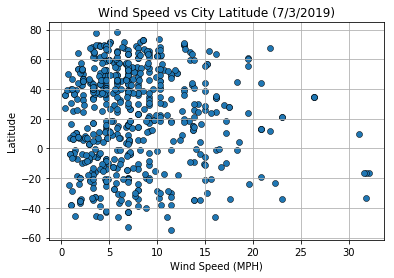

In [64]:
xwnd = citydf['Wind Speed']
ylat = citydf['Lat']
plt.scatter(xwnd, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.title('Wind Speed vs City Latitude (7/3/2019)')
fig = plt.gcf()
fig.savefig("Images/Wind.png")
;